In [1]:
import torch
from torch import nn
import matplotlib.pyplot as plt 
import numpy as np

In [12]:
m = 0.7
c = 0.3

X = torch.arange(0, 1, 0.02).unsqueeze(dim=1)
y = m*X +  c

print("Type of X = ", type(X))
print("Type of y = ", type(y))
X.shape, y.shape

Type of X =  <class 'torch.Tensor'>
Type of y =  <class 'torch.Tensor'>


(torch.Size([50, 1]), torch.Size([50, 1]))

In [13]:
split = int(len(X) * 0.8)
X_train, y_train = X[:split], y[:split]
X_test, y_test = X[split:], y[split:]
print("Shape of X_train = ", X_train.shape)
print("Shape of y_train = ", y_train.shape)

Shape of X_train =  torch.Size([40, 1])
Shape of y_train =  torch.Size([40, 1])


In [14]:
def plot_data(X_train=X_train, y_train=y_train, X_test=X_test, y_test = y_test, predictions=None):
    plt.figure(figsize=(10, 8))
    plt.scatter(X_train, y_train, c='b', s=10, label="Training Data")
    plt.scatter(X_test, y_test, c='r', s=10, label="Testing Data")
    if predictions is not None:
        plt.scatter(X_test, predictions, c='g', s=10, label = "predicted data")
    plt.xlabel('X')
    plt.ylabel('y')
    plt.legend()
    plt.title("Scatter plot of X and y")

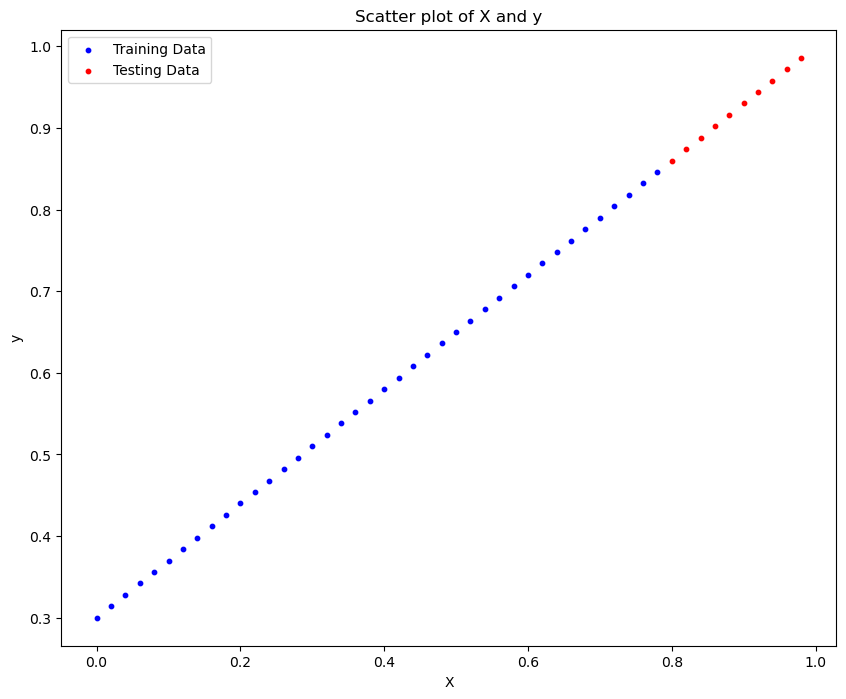

In [15]:
plot_data()

In [20]:
class LinearRegressionModel(nn.Module):
    def __init__(self):
        super().__init__()
        self.weight = nn.Parameter(torch.randn(1, dtype=torch.float, requires_grad=True))
        self.bias = nn.Parameter(torch.randn(1, dtype=torch.float, requires_grad=True))

    def forward(self, x: torch.Tensor) -> torch.Tensor:
        return self.weight * x + self.bias

In [23]:
torch.manual_seed(43)
model_0 = LinearRegressionModel()
list(model_0.parameters())

[Parameter containing:
 tensor([-0.6484], requires_grad=True),
 Parameter containing:
 tensor([-0.7058], requires_grad=True)]

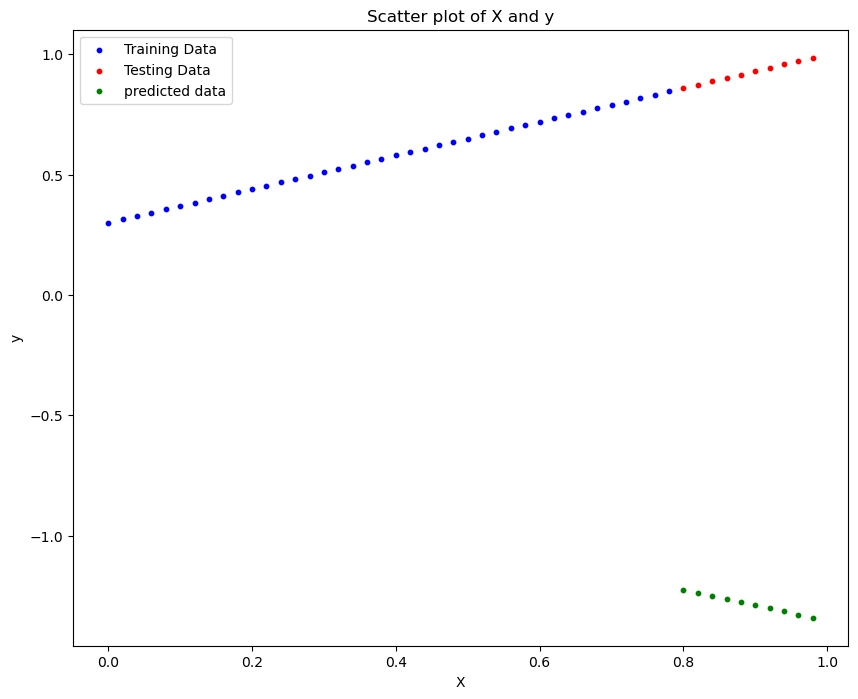

In [24]:
with torch.inference_mode():
    y_pred = model_0(X_test)
    plot_data(predictions=y_pred)

In [25]:
# set loss function
loss_fn = nn.MSELoss()

optimizer = torch.optim.SGD(
    params=model_0.parameters(), lr = 0.1
)

In [26]:
model_0.to('cpu')

LinearRegressionModel()

In [27]:
next(model_0.parameters()).device

device(type='cpu')

In [29]:
epochs = 500
X_train = X_train.to('cpu')
y_train = y_train.to('cpu')
X_test = X_test.to('cpu')
y_test = y_test.to('cpu')
trainLossList = []
testLossList = []
for epoch in range(epochs):
    model_0.train()

    y_pred = model_0(X_train)

    loss = loss_fn(y_train, y_pred)

    optimizer.zero_grad()

    loss.backward()

    optimizer.step()

    with torch.inference_mode():
        test_pred = model_0(X_test)
        test_loss = loss_fn(y_test, test_pred)

    if epoch % 10 == 0:
        print(f"Epoch: {epoch} | Train Loss: {loss:.4f} | Test Loss: {test_loss:.4f}")
    trainLossList.append(loss)
    testLossList.append(test_loss) 

Epoch: 0 | Train Loss: 1.4550 | Test Loss: 2.1148
Epoch: 10 | Train Loss: 0.0355 | Test Loss: 0.1804
Epoch: 20 | Train Loss: 0.0235 | Test Loss: 0.1044
Epoch: 30 | Train Loss: 0.0195 | Test Loss: 0.0841
Epoch: 40 | Train Loss: 0.0162 | Test Loss: 0.0697
Epoch: 50 | Train Loss: 0.0135 | Test Loss: 0.0580
Epoch: 60 | Train Loss: 0.0112 | Test Loss: 0.0482
Epoch: 70 | Train Loss: 0.0093 | Test Loss: 0.0401
Epoch: 80 | Train Loss: 0.0077 | Test Loss: 0.0333
Epoch: 90 | Train Loss: 0.0064 | Test Loss: 0.0277
Epoch: 100 | Train Loss: 0.0054 | Test Loss: 0.0230
Epoch: 110 | Train Loss: 0.0045 | Test Loss: 0.0191
Epoch: 120 | Train Loss: 0.0037 | Test Loss: 0.0159
Epoch: 130 | Train Loss: 0.0031 | Test Loss: 0.0132
Epoch: 140 | Train Loss: 0.0026 | Test Loss: 0.0110
Epoch: 150 | Train Loss: 0.0021 | Test Loss: 0.0091
Epoch: 160 | Train Loss: 0.0018 | Test Loss: 0.0076
Epoch: 170 | Train Loss: 0.0015 | Test Loss: 0.0063
Epoch: 180 | Train Loss: 0.0012 | Test Loss: 0.0052
Epoch: 190 | Train Loss

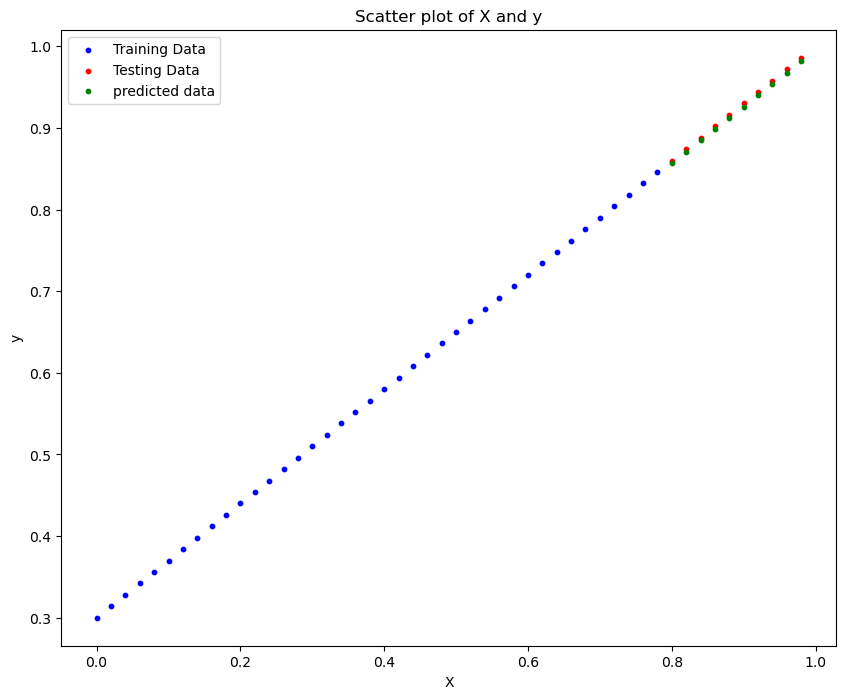

In [30]:
with torch.inference_mode():
    y_pred = model_0(X_test)
    plot_data(predictions=y_pred)